# k-Nearest Neighbor's Algorithm (k-NN)

k-NN is a non-parametric algorithm used for both `regression` and `classification` problems both. The k-NN works well if the same scale is used for all the data. The most important parameter of hte k-NN algorithm is `k` which specifies the number of neighbor observations that contribute to the output predictions. The optimal value of `k` can be obtained mainly through `cross validation`.

**Cross validation** involves randomly dividing the training set into groups or folds of approximately equal size. k-NN makes predictions using the training dataset directly.

The most common distance method used is **Euclidean distance**

## k-NN (Classification Problem)

In [1]:
# Importing the necessary packages and dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.datasets import load_breast_cancer

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
cancer = load_breast_cancer()

In [3]:
# Display the characteristics of dataset
print("Dimension of independent variables are: ", cancer.data.shape)
print("Dimension of dependent variable: ", cancer.target.shape)
print("The variables in the dataset are: \n", cancer.feature_names)

Dimension of independent variables are:  (569, 30)
Dimension of dependent variable:  (569,)
The variables in the dataset are: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
# Train-Test Split of independent and dependent variables
x_trg, x_test, y_trg, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

In [5]:
x_trg.shape

(426, 30)

In [6]:
y_trg.shape

(426,)

In [7]:
x_test.shape

(143, 30)

In [8]:
y_test.shape

(143,)

#### Feature Scaling

In [9]:
sc = StandardScaler()

x_trg = sc.fit_transform(x_trg)
x_test = sc.fit_transform(x_test)

In [10]:
# Encoding the categorical data values
labelencoder_y = LabelEncoder()

y_trg = labelencoder_y.fit_transform(y_trg)
y_test = labelencoder_y.fit_transform(y_test)

### Model Building - k-NN

In [11]:
# Storing accuracy score in an array for different value of k
knn_accuracylist = []

for K in range(21):
    K = K + 1
    # Creating model
    knn_cancer = KNeighborsClassifier(n_neighbors = K)
    
    # Fit the model
    knn_cancer.fit(x_trg, y_trg)
    
    # Prediction on test set
    knn_pred = knn_cancer.predict(x_test)
    
    # Confusion matrix for the model
    knn_results = confusion_matrix(y_test, knn_pred)
    
    # Accuracy of the model
    knn_acc_score = accuracy_score(y_test, knn_pred)
    
    print("The accuracy of KNN model for k = ",K," is: %0.3f"% knn_acc_score)
    print("The confusion matrix of KNN model is: \n", knn_results)
    
    # Adding the accuracy score in the list
    knn_accuracylist.append(knn_acc_score)

The accuracy of KNN model for k =  1  is: 0.930
The confusion matrix of KNN model is: 
 [[48  5]
 [ 5 85]]
The accuracy of KNN model for k =  2  is: 0.909
The confusion matrix of KNN model is: 
 [[49  4]
 [ 9 81]]
The accuracy of KNN model for k =  3  is: 0.951
The confusion matrix of KNN model is: 
 [[49  4]
 [ 3 87]]
The accuracy of KNN model for k =  4  is: 0.944
The confusion matrix of KNN model is: 
 [[49  4]
 [ 4 86]]
The accuracy of KNN model for k =  5  is: 0.951
The confusion matrix of KNN model is: 
 [[47  6]
 [ 1 89]]
The accuracy of KNN model for k =  6  is: 0.944
The confusion matrix of KNN model is: 
 [[47  6]
 [ 2 88]]
The accuracy of KNN model for k =  7  is: 0.944
The confusion matrix of KNN model is: 
 [[47  6]
 [ 2 88]]
The accuracy of KNN model for k =  8  is: 0.944
The confusion matrix of KNN model is: 
 [[48  5]
 [ 3 87]]
The accuracy of KNN model for k =  9  is: 0.951
The confusion matrix of KNN model is: 
 [[48  5]
 [ 2 88]]
The accuracy of KNN model for k =  10

In [12]:
# Determine the best accuracy
print("The maximum accuracy using KNN model is: %0.3f" %max(knn_accuracylist))

The maximum accuracy using KNN model is: 0.965


<AxesSubplot:>

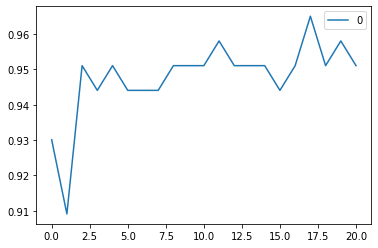

In [13]:
# Display the accuracy of kNN model for different values of k
curve = pd.DataFrame(knn_accuracylist)
curve.plot()

#### Compare the kNN model with Naive Bayes model

In [14]:
# Naive-Bayes Model building
naive_cancer = GaussianNB()

naive_cancer.fit(x_trg, y_trg)
naive_pred = naive_cancer.predict(x_test)
naive_results = confusion_matrix(y_test, naive_pred)
naive_acc_score = accuracy_score(y_test, naive_pred)

print("The accuracy of the Naive Bayes model is: %0.3f"% naive_acc_score)
print("The confusion matrix of the Naive Bayes model is: \n", naive_results)

The accuracy of the Naive Bayes model is: 0.937
The confusion matrix of the Naive Bayes model is: 
 [[48  5]
 [ 4 86]]


#### Compare the kNN model with Logistic Regression model

In [15]:
# Logistic Regression Model building
log_cancer = LogisticRegression()

log_cancer.fit(x_trg, y_trg)
log_pred = log_cancer.predict(x_test)
log_results = confusion_matrix(y_test, log_pred)
log_acc_score = accuracy_score(y_test, log_pred)

print("The accuracy of the Logistic Regression model is: %0.3f"% log_acc_score)
print("The confusion matrix of the Logistic Regression model is: \n", log_results)

The accuracy of the Logistic Regression model is: 0.958
The confusion matrix of the Logistic Regression model is: 
 [[51  2]
 [ 4 86]]


The model performances are
- kNN = 96.5%
- Naive Bayes = 93.7%
- Logistic Regression = 95.8%

From above we can say that kNN is the best model.

---------------------

# k-NN (Regression Problem)

Data Source: [Computer Hardware]("https://archive.ics.uci.edu/ml/datasets/Computer+Hardware")

To understand the regression problem better we have deleted vendor name and model name as they can't be considered as independent variable. The target variable is set as `ERP` and remaining 7 variables as independent variables.

In [16]:
# Importing the necessary packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [17]:
# Loading the dataset
hardware = pd.read_csv("./hardware/machine.data")
hardware

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...,...
203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,sratus,32,125,2000,8000,0,2,14,52,41
206,wang,vs-100,480,512,8000,32,0,0,67,47


In [18]:
# Displaying the characteristics of the dataset
print("Dimension of the dataset is: ", hardware.shape)
print("The names of the variables in the dataset are: ", hardware.columns)

Dimension of the dataset is:  (208, 10)
The names of the variables in the dataset are:  Index(['adviser', '32/60', '125', '256', '6000', '256.1', '16', '128', '198',
       '199'],
      dtype='object')


In [19]:
# Dropping the first 2 columns as they are the vendor name and model name
hardware = hardware.drop(["adviser", "32/60"], axis = 1)
hardware.columns

Index(['125', '256', '6000', '256.1', '16', '128', '198', '199'], dtype='object')

In [20]:
# Renaming the headers as per the information from the datasource
hardware.columns = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX", "PRP", "ERP"]
hardware.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,29,8000,32000,32,8,32,269,253
1,29,8000,32000,32,8,32,220,253
2,29,8000,32000,32,8,32,172,253
3,29,8000,16000,32,8,16,132,132
4,26,8000,32000,64,8,32,318,290


In [21]:
# Displaying the characteristics of the dataset
print("Dimension of the dataset is: ", hardware.shape)
print("The names of the variables in the dataset are: ", hardware.columns)

Dimension of the dataset is:  (208, 8)
The names of the variables in the dataset are:  Index(['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'], dtype='object')


In [22]:
# Checking the missing values
print("Null values in the dataset is: \n", hardware.isnull().sum())
print("Not Available values in the dataset is: \n", hardware.isna().sum())

Null values in the dataset is: 
 MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
ERP      0
dtype: int64
Not Available values in the dataset is: 
 MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
ERP      0
dtype: int64


In [23]:
# Using random seed function to generate the same dataset
np.random.seed(3000)

In [24]:
# Train-Test Split for both independent and dependent features
training, test = train_test_split(hardware, test_size = 0.3)

In [25]:
x_trg = training.drop("ERP", axis = 1)
y_trg = training["ERP"]

x_test = test.drop("ERP", axis = 1)
y_test = test["ERP"]

In [26]:
x_trg.shape

(145, 7)

In [27]:
y_trg.shape

(145,)

In [28]:
x_test.shape

(63, 7)

In [29]:
y_test.shape

(63,)

### Feature Scaling

In [30]:
sc = StandardScaler()

x_trg = sc.fit_transform(x_trg)
x_test = sc.fit_transform(x_test)

In [31]:
# Encoding the categorical variables
labelencoder_y = LabelEncoder()
y_trg = labelencoder_y.fit_transform(y_trg)
y_test = labelencoder_y.fit_transform(y_test)

In [32]:
# Creating a list to store RMSE values of different values of k
knn_rmselist = []

for K in range(30):
    K = K + 1
    # Creating model
    knn_hardware = KNeighborsRegressor(n_neighbors = K)
    
    # Fit the model
    knn_hardware.fit(x_trg, y_trg)
    
    # Predict on test set
    knn_pred = knn_hardware.predict(x_test)
    
    # Calculate the RMSE for the model
    knn_rmse = sqrt(mean_squared_error(y_test, knn_pred))
    print("RMSE value for k = ", K," is: %0.3f" %knn_rmse)
    
    # Store RMSE values in the array
    knn_rmselist.append(knn_rmse)

RMSE value for k =  1  is: 17.360
RMSE value for k =  2  is: 17.545
RMSE value for k =  3  is: 17.642
RMSE value for k =  4  is: 17.525
RMSE value for k =  5  is: 17.687
RMSE value for k =  6  is: 17.673
RMSE value for k =  7  is: 17.328
RMSE value for k =  8  is: 17.345
RMSE value for k =  9  is: 17.168
RMSE value for k =  10  is: 16.972
RMSE value for k =  11  is: 16.913
RMSE value for k =  12  is: 16.491
RMSE value for k =  13  is: 16.304
RMSE value for k =  14  is: 16.035
RMSE value for k =  15  is: 15.750
RMSE value for k =  16  is: 15.556
RMSE value for k =  17  is: 15.477
RMSE value for k =  18  is: 15.299
RMSE value for k =  19  is: 15.038
RMSE value for k =  20  is: 14.816
RMSE value for k =  21  is: 14.640
RMSE value for k =  22  is: 14.439
RMSE value for k =  23  is: 14.375
RMSE value for k =  24  is: 14.160
RMSE value for k =  25  is: 14.041
RMSE value for k =  26  is: 13.805
RMSE value for k =  27  is: 13.655
RMSE value for k =  28  is: 13.529
RMSE value for k =  29  is: 1

<AxesSubplot:>

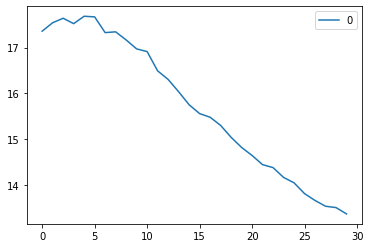

In [33]:
# Display the RMSE of KNN models for different values of k
curve = pd.DataFrame(knn_rmselist)
curve.plot()

### Compare the KNN model with Linear Regression Model

In [34]:
# Linear Regression Model building
lm_hardware = linear_model.LinearRegression()

lm_hardware.fit(x_trg, y_trg)
lm_pred = lm_hardware.predict(x_test)

print("Coefficient of independent variables: \n", lm_hardware.coef_)
print("Intercept in the model: ", lm_hardware.intercept_)

lm_rmse = sqrt(mean_squared_error(y_test, lm_pred))
print("RMSE value for Linear Regression model is: %0.3f" %lm_rmse)

Coefficient of independent variables: 
 [ -2.70796989   4.87806313  24.61551806  14.29949788   0.23671338
   0.86816596 -19.31672678]
Intercept in the model:  33.99310344827586
RMSE value for Linear Regression model is: 21.057


The model performances are:
- KNN = Least value of RMSE is 13.361
- Linear Regression = Least value of RMSE is 21.057

From above RMSE values of both the models we can conclude that KNN model is the best model for this regression problem.